In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=9f086a65d1b8cf16dfc9c66d752c23adee366b6909c9396a3435bbcdee576db9
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

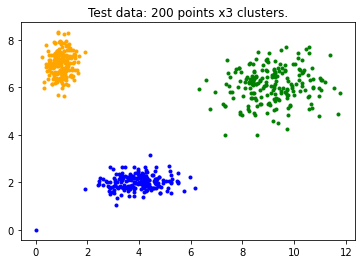

In [ ]:
# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [9, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])

ax0.set_title('Test data: 200 points x3 clusters.')
plt.show()

[[0.21283067 0.2993182  0.23747484 ... 0.97854041 0.99368841 0.9654133 ]
 [0.78716933 0.7006818  0.76252516 ... 0.02145959 0.00631159 0.0345867 ]]
[[6.40693262e-01 9.89842263e-01 9.98706615e-01 ... 6.47885180e-03
  1.78154803e-02 1.55052837e-02]
 [1.04492784e-01 4.84512217e-03 5.44898568e-04 ... 9.89125065e-01
  9.70458973e-01 9.72822878e-01]
 [2.54813954e-01 5.31261469e-03 7.48486433e-04 ... 4.39608316e-03
  1.17255470e-02 1.16718385e-02]]
[[8.25728226e-02 4.28494617e-03 4.38055971e-04 ... 9.20855898e-01
  4.77195339e-03 7.39431947e-01]
 [1.06734047e-01 6.53773242e-03 6.63438126e-04 ... 7.48000444e-02
  9.94637494e-01 2.43067019e-01]
 [2.29036643e-01 5.79301675e-03 7.38497933e-04 ... 1.76057270e-03
  2.35107730e-04 7.53335205e-03]
 [5.81656488e-01 9.83384305e-01 9.98160008e-01 ... 2.58348452e-03
  3.55444530e-04 9.96768198e-03]]
[[1.17489189e-01 6.93320343e-04 4.88022479e-03 ... 3.81475279e-03
  1.21872093e-02 1.07054375e-02]
 [2.60143514e-01 9.71634316e-01 3.75581629e-01 ... 6.456868

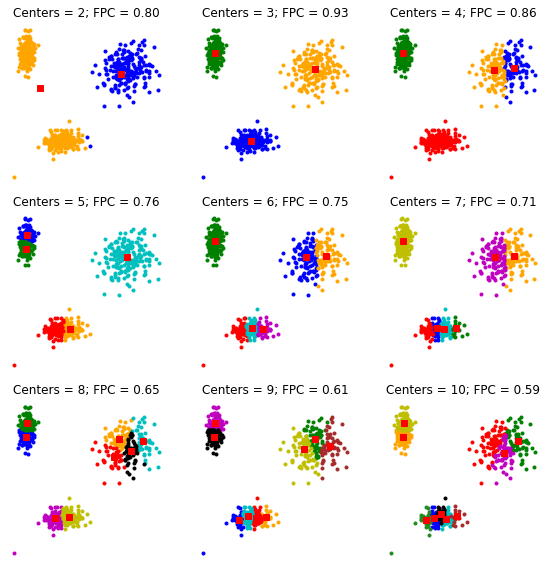

In [ ]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

#print (alldata)
           
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    print (u)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
plt.show()

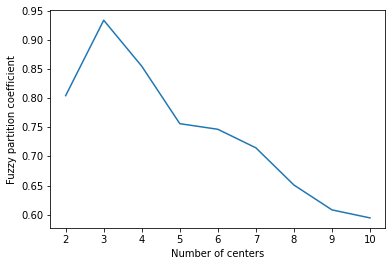

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris_org.txt to iris_org.txt


In [ ]:
read_file=open("iris_org.txt",'r')
read_content= read_file.read()

all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)-1
print ("Number the features/samples :- ", No_of_features)

Number of the data points :-  150
Number the features/samples :-  4


In [ ]:

Df=np.zeros((No_data_points,No_of_features))
true_label = []
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        Df[counter][i]= values[i]
    true_label.append(int(values[No_of_features]))     #
    counter+=1
print (true_label)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
D = StandardScaler().fit_transform(Df)

In [ ]:
print(D)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [ 1.40150837e+00  3.28414053e-01  5.35408562e-01  2.64141916e-01]
 [ 5.53333275e-01  5.58610819e-01  1.27429511e+00  1.71209594e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [ 6.74501145e-01  3.28414053e-01  4.21733708e-01  3.95774101e-01]
 [-5.25060772e-02 -8.22569778e-01  7.62758269e-01  9.22302838e-01]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [ 1.28034050e+00  9.82172869e-02  6.49083415e-01  3.95774101e-01]
 [ 1.52267624e+00 -1.31979479e-01  1.21745768e+00  1.18556721e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-4.16009689e-01 -1.74335684e+00  1.37546573e-01  1.32509732e-01]
 [ 5.53333275e-01 -3.62176246e-01  1.04694540e+00  7.90670654e-01]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [ 7.95669016e-01 -5.92373012e-01  4.78571135e-01  3.95774101e-01]
 [ 7.95669016e-01 -1.31979479e-01  1.16062026e+00  1.31719939e

In [ ]:
pip install fuzzy-c-means

In [ ]:
from fcmeans import FCM

3

In [ ]:
fcm = FCM(n_clusters=3)
fcm.fit(D)

In [ ]:
fcm_labels  = fcm.u.argmax(axis=1)
print (fcm_labels)

[1 2 2 1 2 0 1 2 2 1 0 2 1 0 2 1 0 2 1 2 0 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1
 0 2 1 0 0 1 0 2 1 2 2 1 0 2 1 0 2 1 0 2 1 0 0 1 2 2 1 0 0 1 0 2 1 0 0 1 0
 2 1 2 2 1 2 0 1 2 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 0 1 0 0 1 2 2 1 2 2
 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1
 0 0]


In [ ]:
Sil_score=silhouette_score(D,fcm_labels)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.45844171606773937


In [ ]:
from sklearn import metrics
ARI=metrics.adjusted_rand_score(true_label, fcm_labels)
print (ARI)

0.6303393343888227


4

In [ ]:
fcm = FCM(n_clusters=4)
fcm.fit(D)

In [ ]:
fcm_labels  = fcm.u.argmax(axis=1)
print (fcm_labels)

[0 1 1 0 3 3 0 1 1 0 2 3 0 3 1 0 2 1 0 3 2 0 2 1 0 3 3 0 2 1 0 2 1 0 3 3 0
 2 1 0 3 2 0 2 3 0 3 1 0 3 1 0 2 1 0 2 1 0 2 2 0 3 1 0 3 3 0 3 1 0 3 3 0 3
 1 0 3 1 0 3 3 0 3 3 0 3 3 0 2 1 0 2 1 0 2 1 0 2 1 0 3 3 0 3 3 0 3 1 0 3 1
 0 2 1 0 3 3 0 2 1 0 2 1 2 3 1 0 2 3 0 2 1 0 2 1 0 3 1 0 3 3 0 3 1 0 2 1 0
 2 3]


In [ ]:
Sil_score=silhouette_score(D,fcm_labels)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.40166519755723556


In [ ]:
from sklearn import metrics
ARI=metrics.adjusted_rand_score(true_label, fcm_labels)
print (ARI)

0.5877101724547279


5

In [ ]:
fcm = FCM(n_clusters=5)
fcm.fit(D)

In [ ]:
fcm_labels  = fcm.u.argmax(axis=1)
print (fcm_labels)

[2 3 0 2 3 1 2 3 0 2 4 3 2 3 0 2 1 0 2 3 4 2 4 0 2 3 3 2 4 0 2 4 0 2 1 3 2
 4 0 2 1 1 2 1 3 2 3 0 2 1 3 2 4 0 2 4 0 2 4 4 2 3 0 2 1 1 2 1 0 2 1 3 2 1
 0 2 3 0 2 3 3 2 3 3 2 1 3 2 4 0 2 4 0 2 4 0 2 4 3 2 1 3 2 1 1 2 1 0 2 3 0
 2 4 3 2 1 3 2 4 0 2 4 0 4 1 0 2 4 1 2 4 0 2 4 0 2 1 0 2 1 3 2 1 3 2 4 0 2
 1 1]


In [ ]:
Sil_score=silhouette_score(D,fcm_labels)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.34484024066672936


In [ ]:
from sklearn import metrics
ARI=metrics.adjusted_rand_score(true_label, fcm_labels)
print (ARI)

0.5617346375631308
